In [1]:
from IPython.display import Image

# Queues

## Pseudo-code

In [2]:
'''
    #########################################
                  QUEUE ADT
    #########################################

    - logical data structure that follows the discipline FIFO (First In First Out)
    - Has 2 Ends :
        - Front (deletion)
        - Rear (insertion)

    Data:
        1. Space for storing elements
        2. Front
        3. Rear

    Operations:
        1. enqueue(element)
        2. dequeue()
        3. isEmpty()
        4. isFull()
        5. first()
        6. last()
        7. display()
        8. countElements()

    - Can be implementd using Array or Linked List (physical data structures)
'''
print()

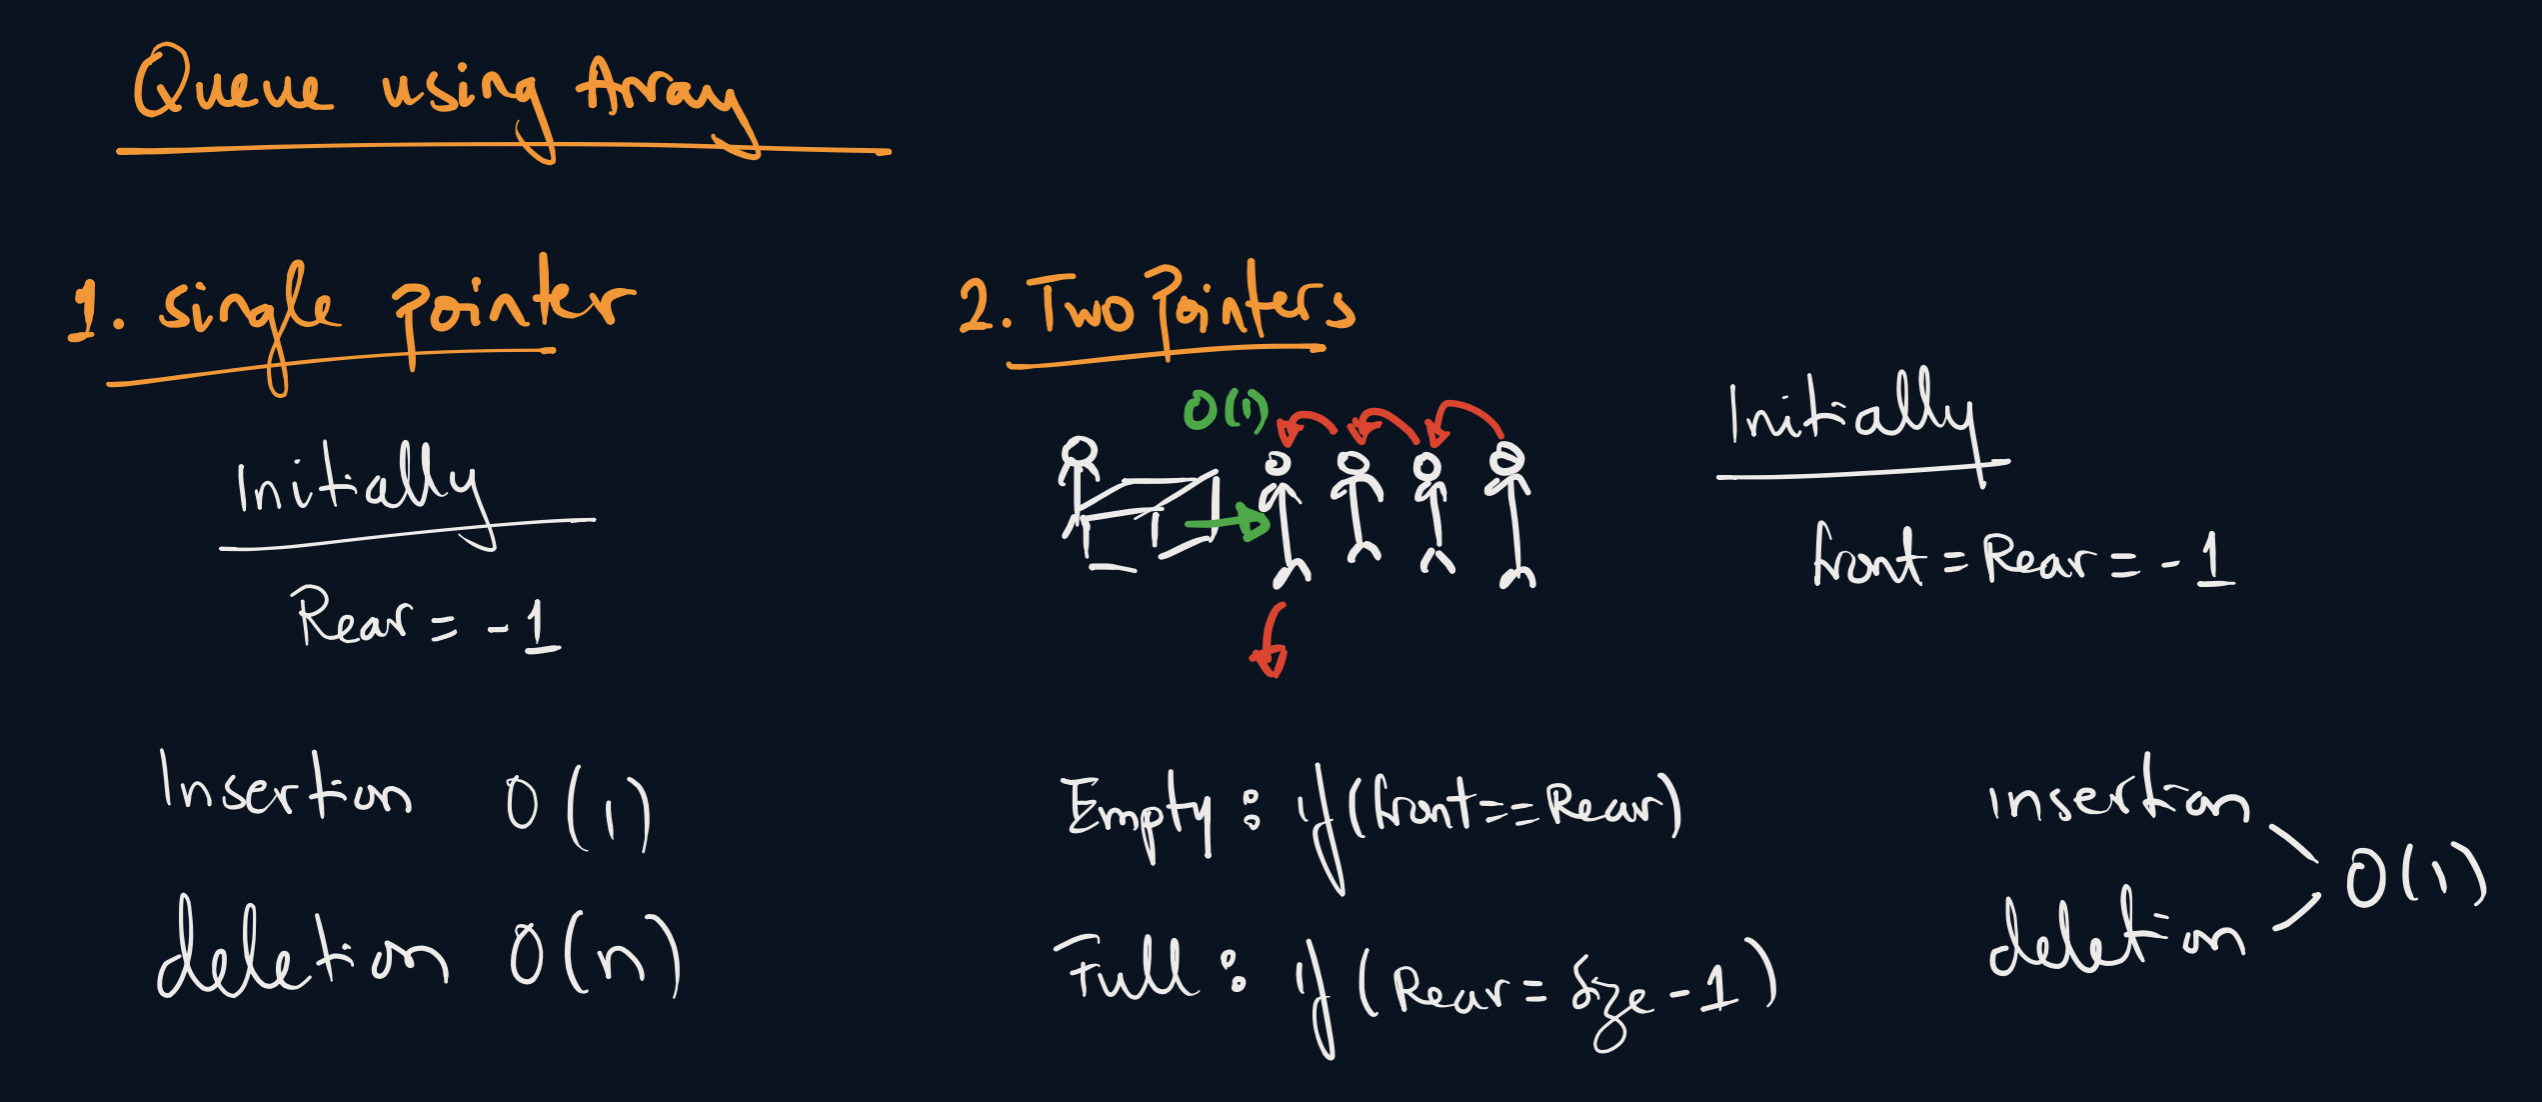

In [4]:
Image(filename='./resources/q1.png')

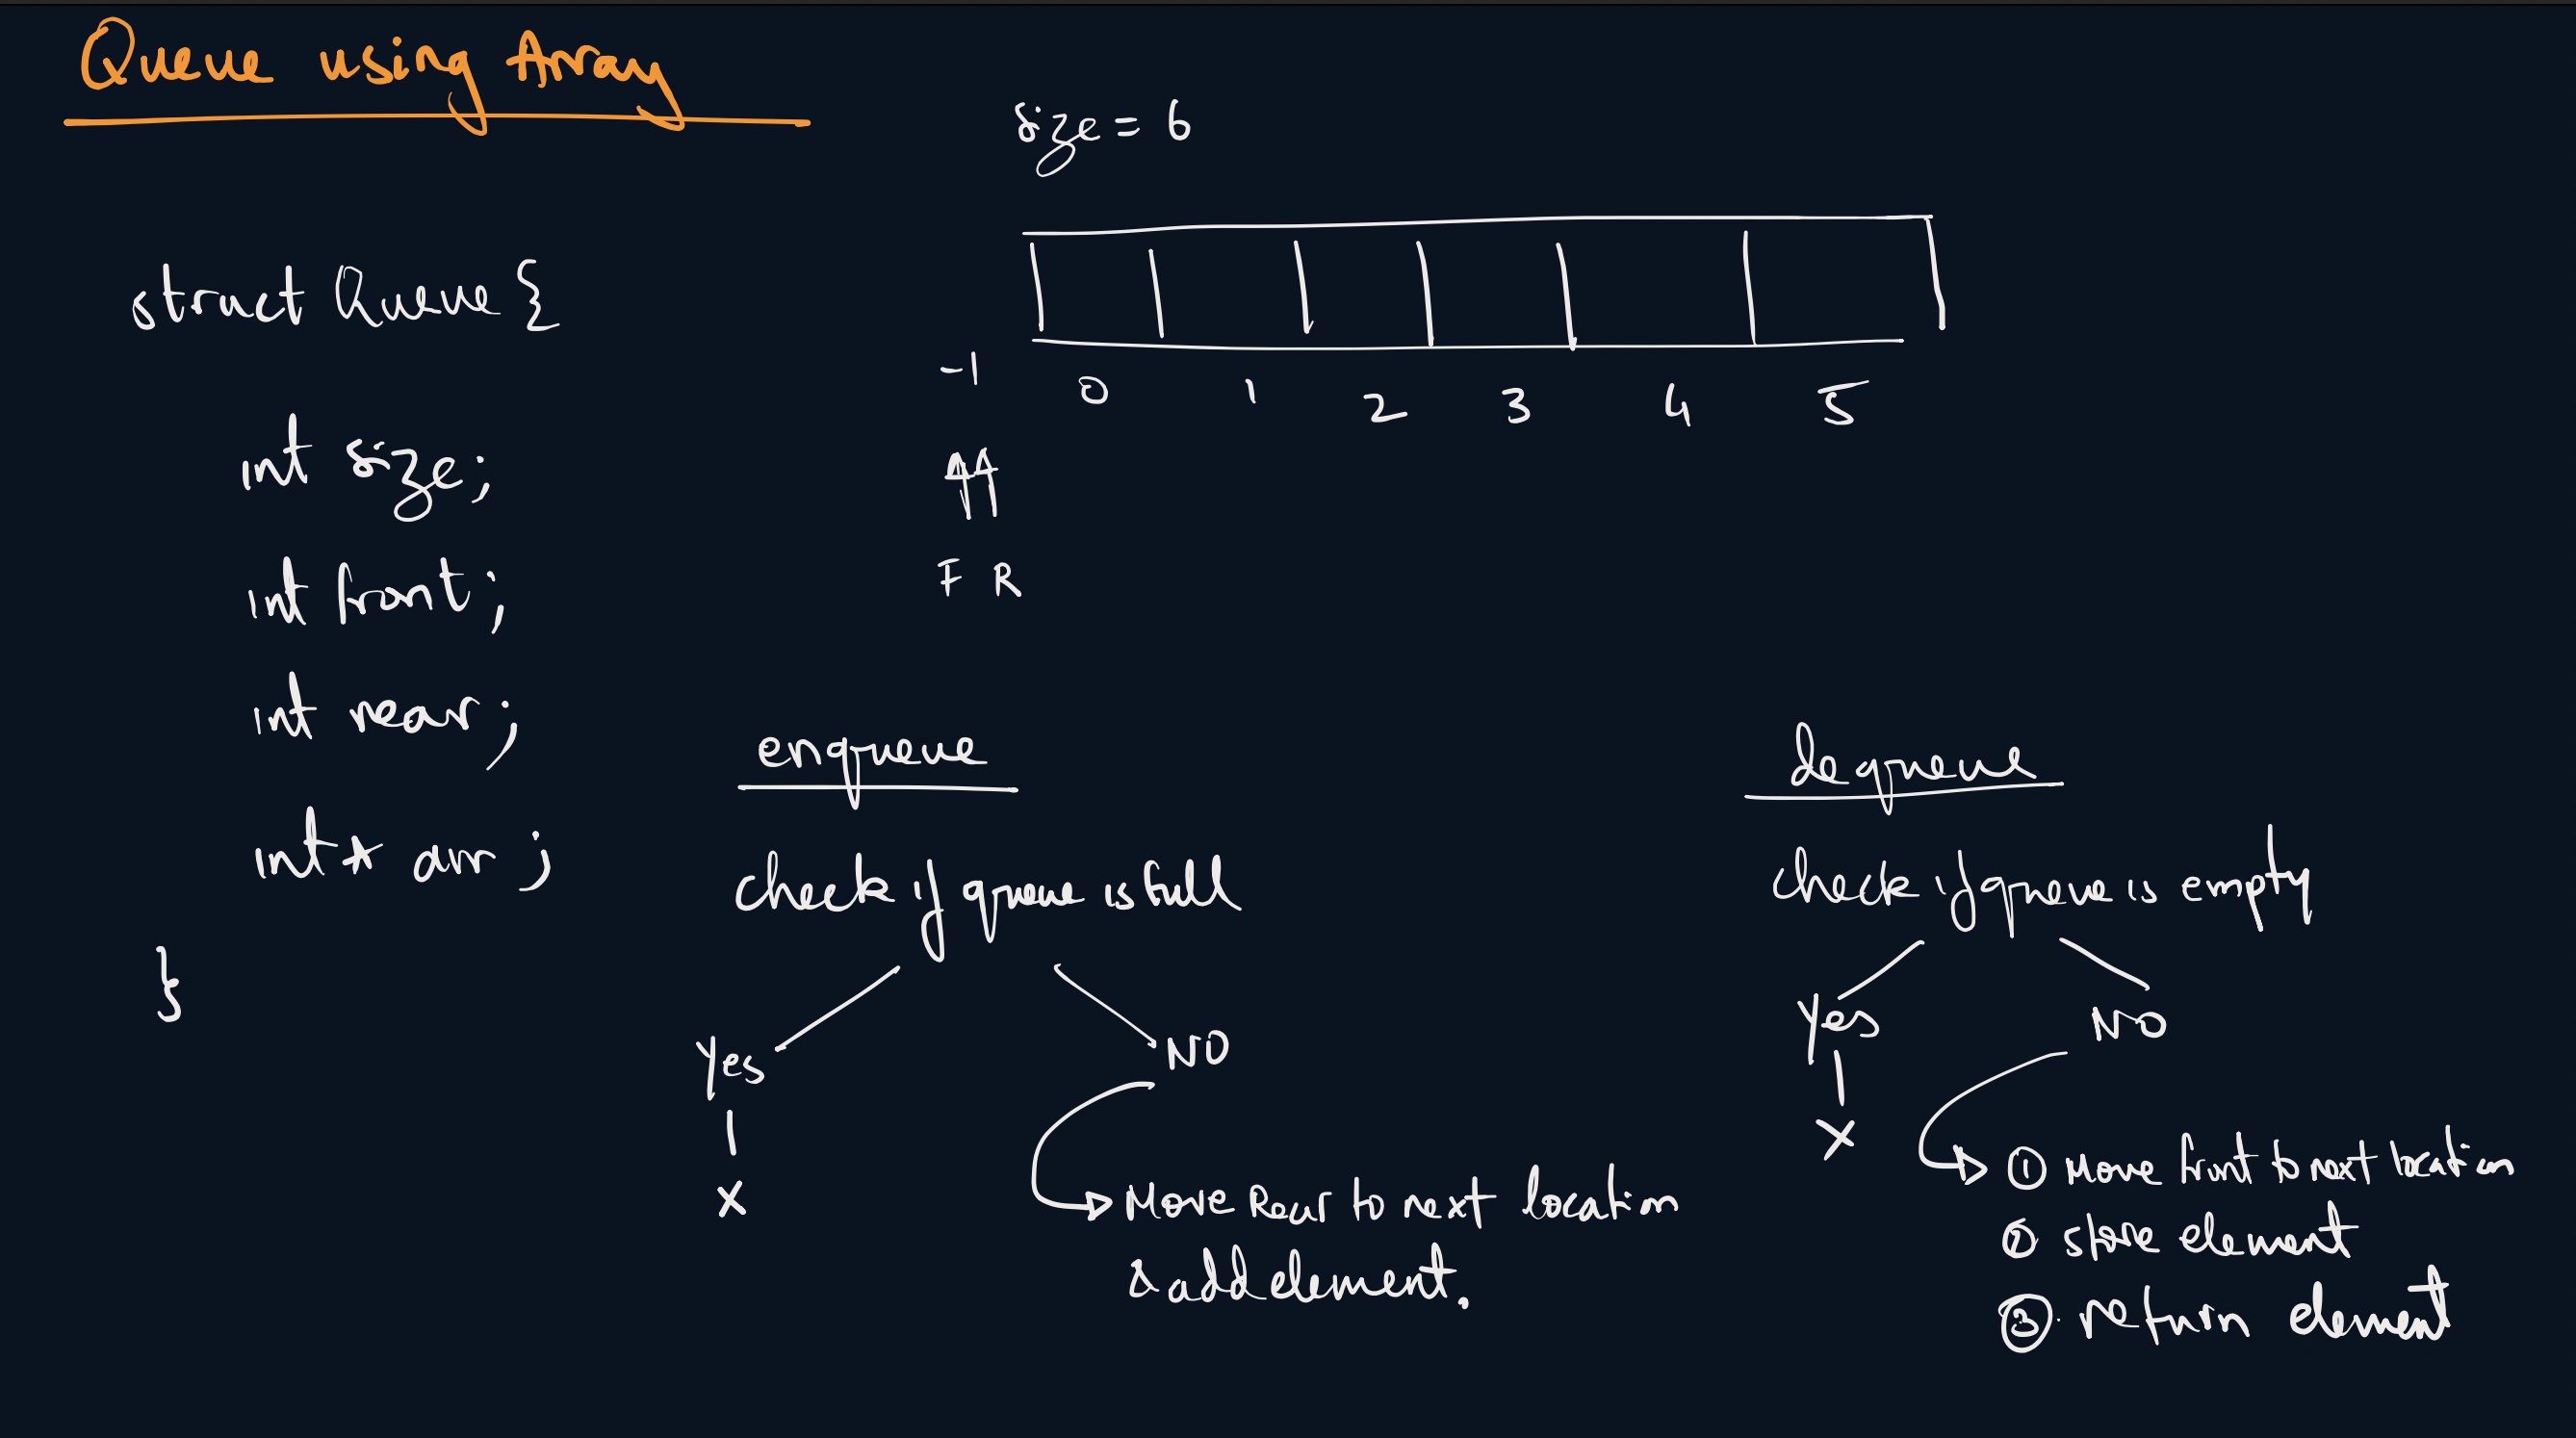

In [5]:
Image(filename='./resources/q2.png')

In [ ]:
'''
Drawback of using array to implement queue:
    - cannot use space of deleted elements
    - every space can only be used once
    - situation were queue is full as well as empty

Solutions:
    1. Resetting pointers: when every queue becomes empty set front and rear to -1
'''
print()

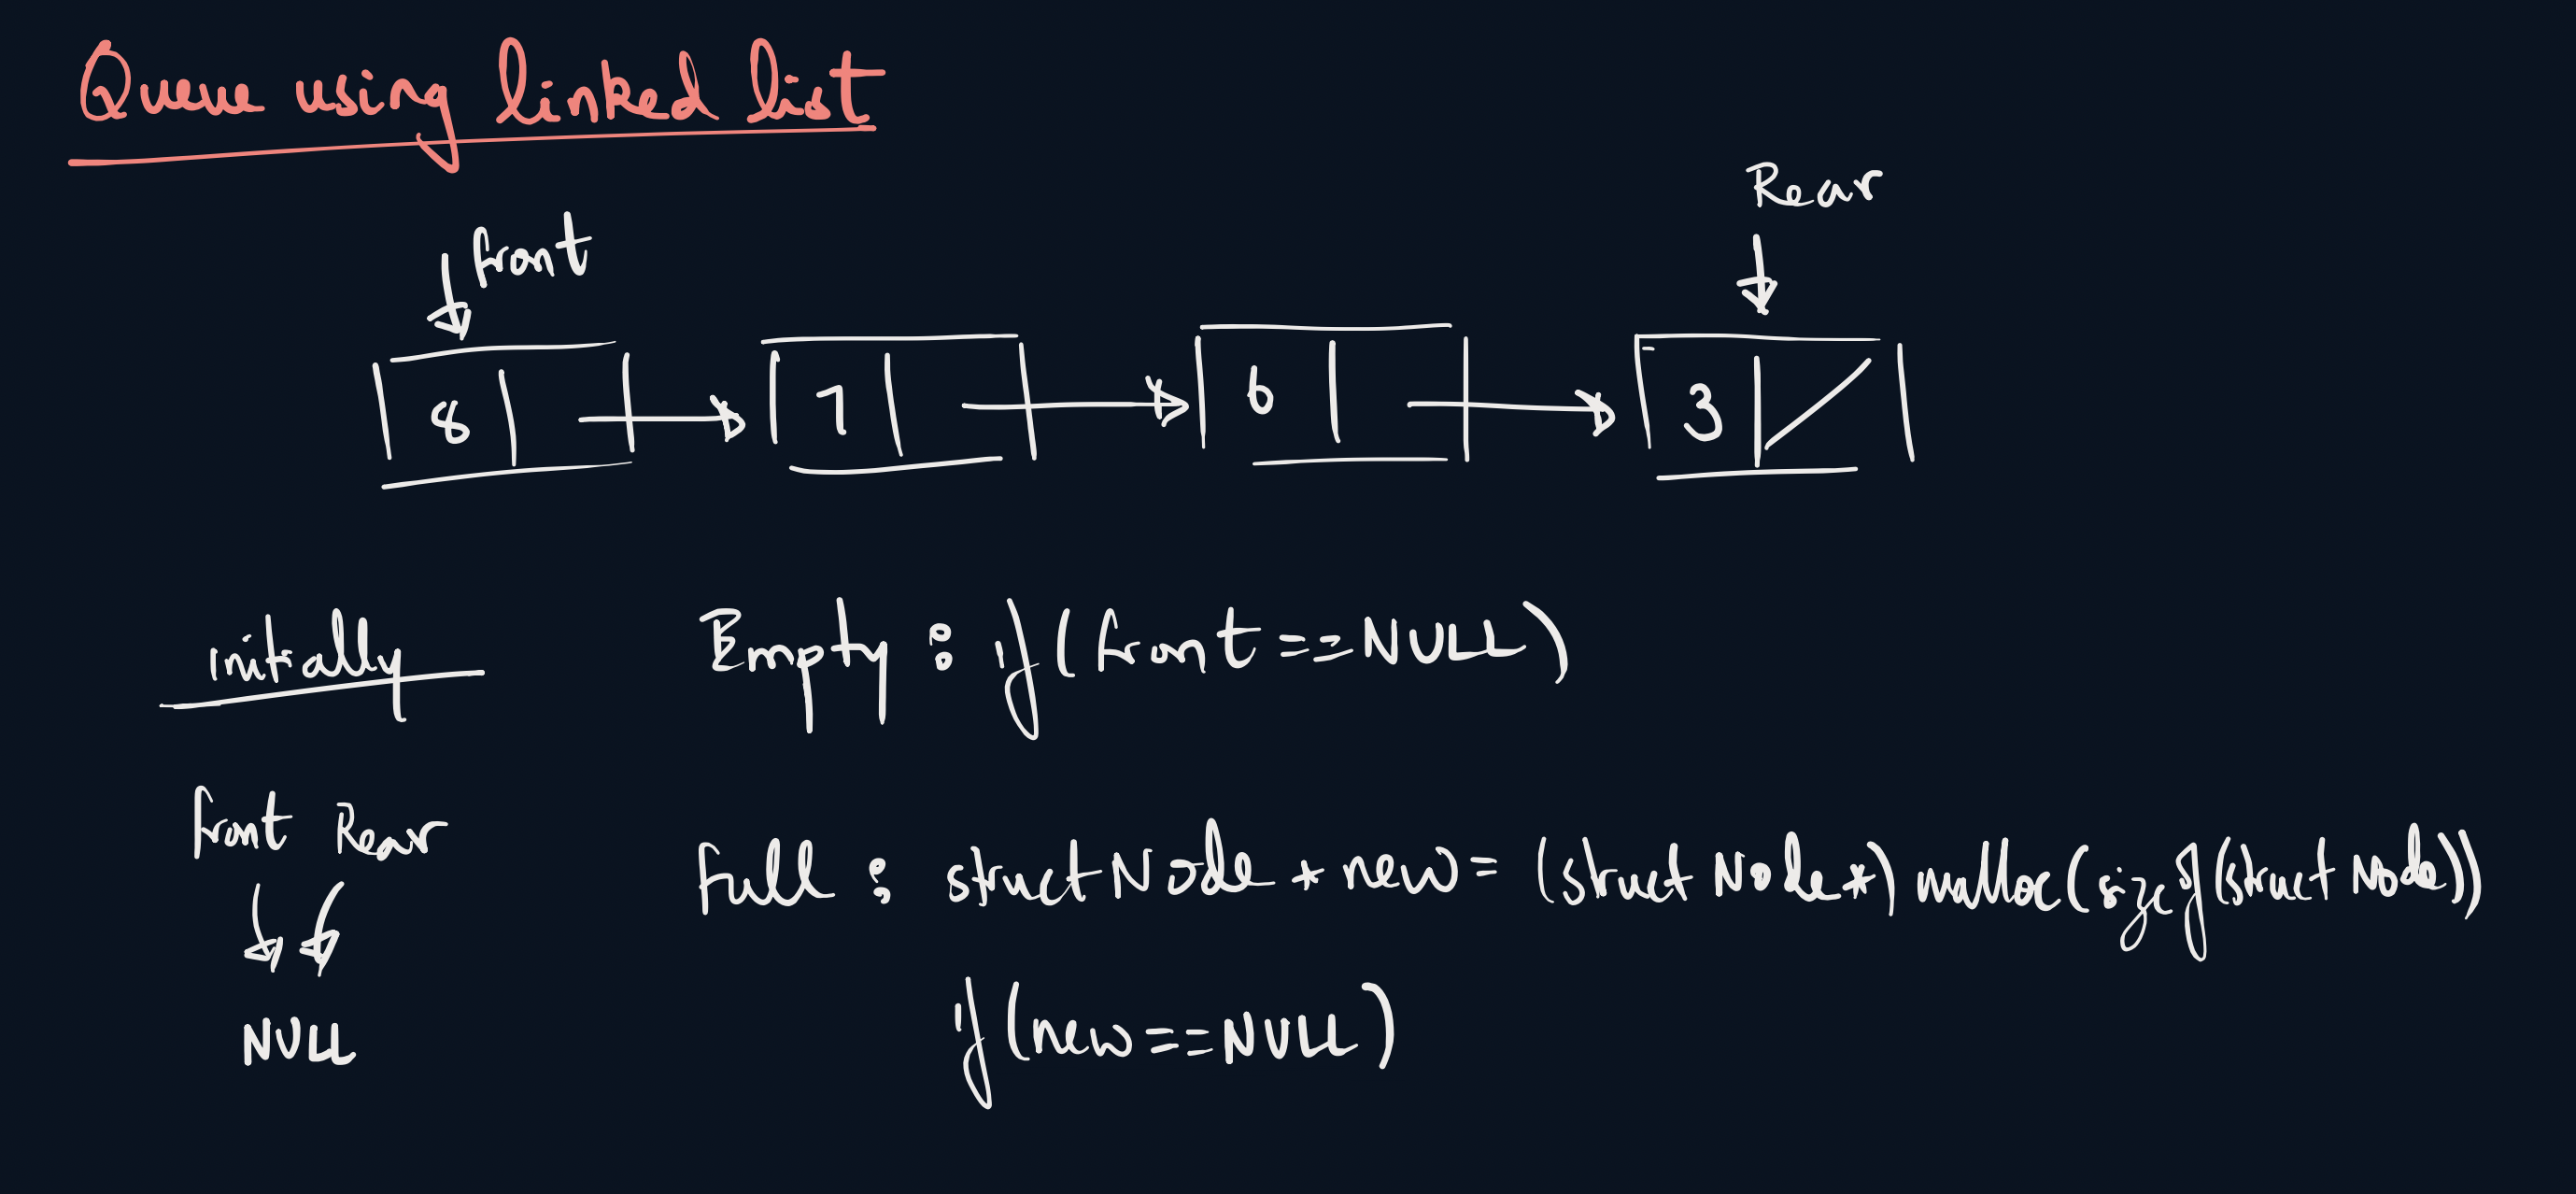

In [2]:
Image(filename='./resources/q3.png')

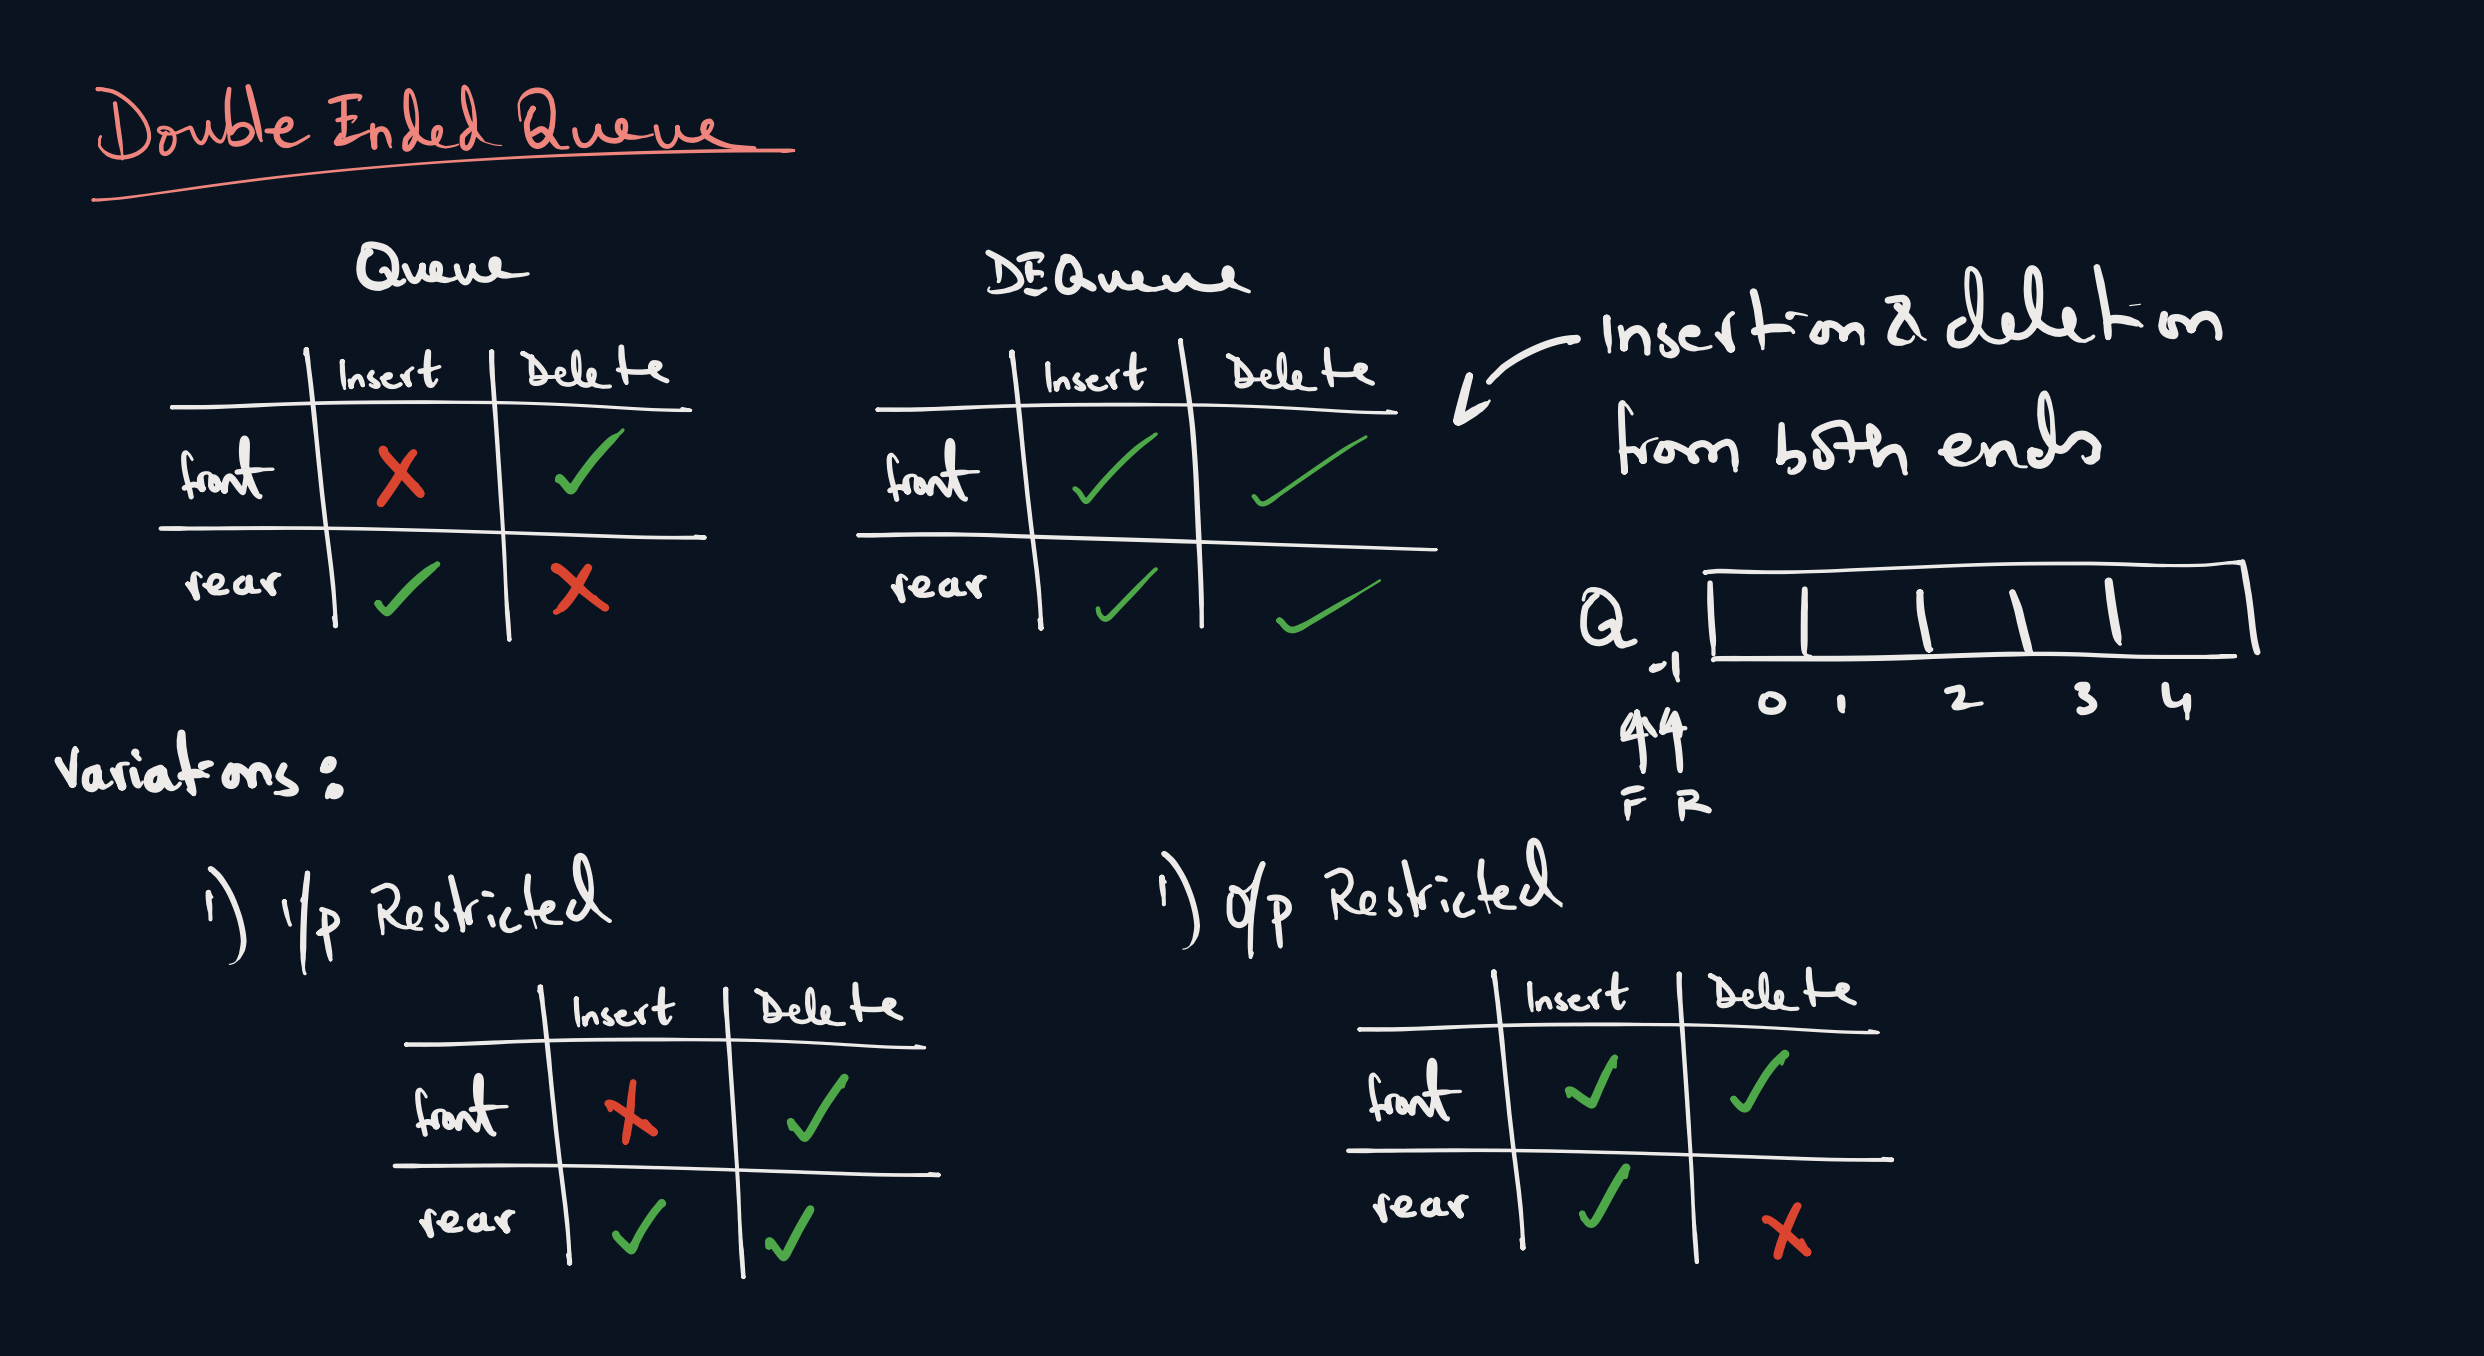

In [13]:
Image(filename='./resources/q4.png')

## Implementation

```C
#include <stdio.h>
#include <stdlib.h>

struct Queue { // queue using array
    int capacity;
    int front;
    int rear;
    int* arr;
};

int isEmpty(struct Queue q){
    return q.front == q.rear ? 1 : 0;
}

int isFull(struct Queue q){
    return q.rear == q.capacity-1 ? 1 : 0;
}

void enqueue(struct Queue* q, int element){
    if(isFull(*q)) printf("Queue is Full\n");
    else{
        q->arr[++q->rear] = element;
    }
}

int dequeue(struct Queue* q){
    int x = -1;
    if(isEmpty(*q)) printf("Queue is Empty\n");
    else{
        x = q->arr[++q->front];
    }
    return x; 
}

void display(struct Queue q){
    if(isEmpty(q)) printf("Queue is Empty\n");
    else{
        for(int i = q.front+1; i<=q.rear ; i++ ){
            printf("%d ",q.arr[i]);
        }
        printf("\n");
    }
}

int main() {

    struct Queue q;
    printf("Enter the size of the Queue: ");
    scanf(" %d",&q.capacity);
    q.front = q.rear = -1;
    q.arr = (int*)malloc(q.capacity*sizeof(int));

    int ch,x;

    do{
        printf("\n\n");
        printf("#############\n");
        printf("     Menu    \n");
        printf("#############\n");
        printf("1. enqueue\n");
        printf("2. dequeue\n");
        printf("3. display\n");
        printf("4. exit\n");

        printf("Enter Option: ");
        scanf(" %d",&ch);

        switch(ch){
            case 1:
                printf("Enter Element: ");
                scanf(" %d",&x);
                enqueue(&q,x);
                break;
            case 2:
                x = dequeue(&q);
                printf("Removed Element: %d", x);
                break;
            case 3:
                display(q);
                break;
        }

    }while(ch != 4);


    return 0;
}
```

```C
#include <stdio.h>
#include <stdlib.h>

// Circular queue

struct Queue { // queue using array
    int capacity;
    int front;
    int rear;
    int* arr;
};

int isEmpty(struct Queue q){
    return q.front == q.rear ? 1 : 0;
}

int isFull(struct Queue q){
    return (q.rear+1)%q.capacity == q.front ? 1 : 0;
}

void enqueue(struct Queue* q, int element){ // O(1)
    if(isFull(*q)) printf("Queue is Full\n");
    else{
        q->rear = (q->rear+1)%q->capacity;
        q->arr[q->rear] = element;
    }
}

int dequeue(struct Queue* q){ // O(1)
    int x = -1;
    if(isEmpty(*q)) printf("Queue is Empty\n");
    else{
        q->front = (q->front+1)%q->capacity;
        x = q->arr[q->front];
    }
    return x; 
}

void display(struct Queue q){
    if(isEmpty(q)) printf("Queue is Empty\n");
    else{
        int i = (q.front+1)%q.capacity;
        while(i != (q.rear+1)%q.capacity){
            printf("%d ",q.arr[i]);
            i = (i+1)%q.capacity;
        }
        printf("\n");
    }
}

int main() {

    struct Queue q;
    printf("Enter the size of the Queue: ");
    scanf(" %d",&q.capacity);
    q.front = q.rear = 0; // space where front is pointing to will always be empty.
    q.arr = (int*)malloc(q.capacity*sizeof(int));

    int ch,x;

    do{
        printf("\n\n");
        printf("#############\n");
        printf("     Menu    \n");
        printf("#############\n");
        printf("1. enqueue\n");
        printf("2. dequeue\n");
        printf("3. display\n");
        printf("4. exit\n");

        printf("Enter Option: ");
        scanf(" %d",&ch);

        switch(ch){
            case 1:
                printf("Enter Element: ");
                scanf(" %d",&x);
                enqueue(&q,x);
                break;
            case 2:
                x = dequeue(&q);
                printf("Removed Element: %d", x);
                break;
            case 3:
                display(q);
                break;
        }

    }while(ch != 4);


    return 0;
}
```

```C
#include <stdio.h>
#include <stdlib.h>

// queue using linked-list

struct Node {
    int data;
    struct Node* next;
}; // remember semi-colon after defining struct

struct Node *front, *rear = NULL;

int isEmpty(){
    return front == NULL ? 1 : 0;
}

int isFull(){
    struct Node* new = (struct Node*)malloc(sizeof(struct Node));
    int res = new == NULL ? 1 : 0;
    free(new);
    return res;
}

void enqueue(int element){
    if(isFull()){
        printf("Queue is Full\n");
        return;
    }

    struct Node* new = NULL;

    if(isEmpty()){ // special case
        new = (struct Node*)malloc(sizeof(struct Node));
        new->data = element;
        new->next = NULL;
        front = rear = new;
    }
    else {
        new = (struct Node*)malloc(sizeof(struct Node));
        new->data = element;
        new->next = NULL;
        rear->next = new;
        rear = new;
    }
}

int dequeue(){
    int x = -1;
    if(isEmpty()) printf("Queue is Empty\n");
    else{
        struct Node* temp = front;
        front = front->next;
        x = temp->data;
        free(temp);
    }
    return x; 
}

void display(){
    if(isEmpty()) printf("Queue is Empty\n");
    else{
        struct Node* t = front;
        while(t){
            printf("%d ",t->data);
            t=t->next;
        }
        printf("\n");
    }
}

int main() {

    int ch,x;

    do{
        printf("\n\n");
        printf("#############\n");
        printf("     Menu    \n");
        printf("#############\n");
        printf("1. enqueue\n");
        printf("2. dequeue\n");
        printf("3. display\n");
        printf("4. exit\n");

        printf("Enter Option: ");
        scanf(" %d",&ch);

        switch(ch){
            case 1:
                printf("Enter Element: ");
                scanf(" %d",&x);
                enqueue(x);
                break;
            case 2:
                x = dequeue();
                printf("Removed Element: %d", x);
                break;
            case 3:
                display();
                break;
        }

    }while(ch != 4);


    return 0;
}
```